In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("digit-recognizer\\train.csv")
data.shape

(42000, 785)

In [5]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev=X_dev/255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train =X_train/ 255

In [6]:
def init_params():
    W1 = np.random.rand(10,784) -0.5 
    b1 = np.random.rand(10,1) -0.5
    W2 = np.random.rand(10,10) -0.5
    b2 = np.random.rand(10,1) -0.5
    return W1,b1,W2,b2

def ReLU(Z):
    return np.maximum(0,Z)

def derive_ReLU(Z):
    return Z>0

def softmax(Z):
    return np.exp(Z)/ sum(np.exp(Z))

def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X)+b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1)+b2
    A2 = softmax(Z2) 
    return Z1,A1,Z2,A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    return one_hot_Y.T

def back_prop(Z1,A1,Z2,A2,W2,X,Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 =  1/m*dZ2.dot(A1.T)
    db2 = 1/m*np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2)*derive_ReLU(Z1)
    dW1 = 1/m*dZ1.dot(X.T)
    db1 = 1/m*np.sum(dZ1)
    return dW1,db1,dW2,db2


def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1 = W1-alpha*dW1
    b1 = b1-alpha*db1
    W2 = W2-alpha*dW2
    b2 = b2-alpha*db2
    return W1,b1,W2,b2


def get_prediction(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions==Y)/Y.size


In [7]:
def gradient_descent(X,Y,iterations,alpha):
    W1,b1,W2,b2 = init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2 =back_prop(Z1,A1,Z2,A2,W2,X,Y)
        W1,b1,W2,b2=update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i%10==0:
            print("Iterations: ",i)
            print("Accuracy: ",get_accuracy(get_prediction(A2),Y))
    return W1,b1,W2,b2
    

In [8]:
W1,b1,W2,b2 = gradient_descent(X_train,Y_train,500,0.1)

Iterations:  0
[7 4 1 ... 4 9 2] [1 0 7 ... 7 2 5]
Accuracy:  0.10402439024390243
Iterations:  10
[1 4 1 ... 2 9 2] [1 0 7 ... 7 2 5]
Accuracy:  0.17609756097560975
Iterations:  20
[1 0 1 ... 2 9 2] [1 0 7 ... 7 2 5]
Accuracy:  0.24785365853658536
Iterations:  30
[1 0 1 ... 2 9 2] [1 0 7 ... 7 2 5]
Accuracy:  0.30509756097560975
Iterations:  40
[1 0 1 ... 2 2 2] [1 0 7 ... 7 2 5]
Accuracy:  0.35785365853658535
Iterations:  50
[1 0 1 ... 2 2 2] [1 0 7 ... 7 2 5]
Accuracy:  0.4102682926829268
Iterations:  60
[1 0 1 ... 2 2 2] [1 0 7 ... 7 2 5]
Accuracy:  0.4578536585365854
Iterations:  70
[1 0 5 ... 2 2 2] [1 0 7 ... 7 2 5]
Accuracy:  0.501780487804878
Iterations:  80
[1 0 0 ... 2 2 2] [1 0 7 ... 7 2 5]
Accuracy:  0.5409268292682927
Iterations:  90
[1 0 0 ... 7 2 2] [1 0 7 ... 7 2 5]
Accuracy:  0.575170731707317
Iterations:  100
[1 0 9 ... 7 2 2] [1 0 7 ... 7 2 5]
Accuracy:  0.6069512195121951
Iterations:  110
[1 0 9 ... 7 2 2] [1 0 7 ... 7 2 5]
Accuracy:  0.6329756097560976
Iterations: 

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_prediction(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


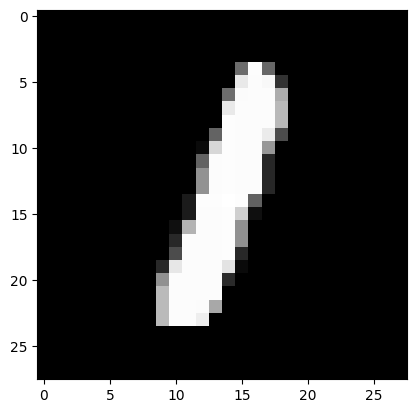

Prediction:  [0]
Label:  0


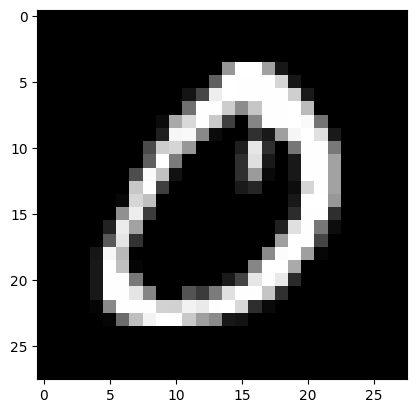

Prediction:  [9]
Label:  7


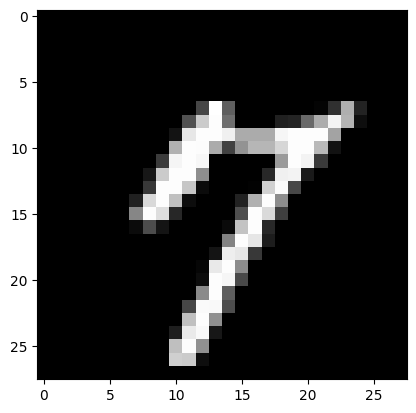

Prediction:  [6]
Label:  6


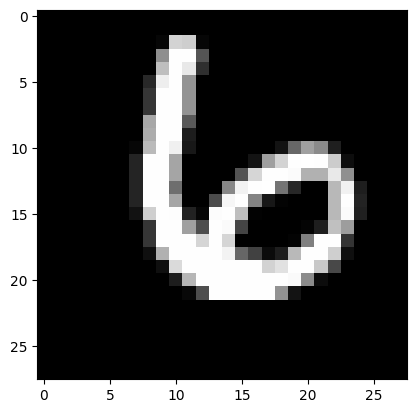

In [10]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [11]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 5 7 2 6 4 9 2 6 3 8 3 7 4 8 7 2 2 3 0 7 3 9 3 7 7 3 2 5 3 1 5 5 6 5 3 7
 2 4 2 6 8 8 4 0 7 4 7 6 9 7 1 4 1 1 3 5 7 3 5 1 3 9 6 7 8 7 8 0 7 1 7 7 4
 6 7 2 6 9 6 5 8 6 5 7 6 5 0 9 2 5 6 0 0 3 8 0 0 8 5 1 8 2 2 9 6 8 3 4 3 6
 4 3 6 9 7 9 4 7 3 2 2 8 5 7 0 4 7 9 9 8 6 0 3 1 6 4 1 3 7 3 0 7 2 7 1 4 2
 7 7 7 7 5 4 3 4 4 9 2 1 6 2 9 0 8 6 1 9 1 6 1 5 8 5 3 9 6 8 1 1 3 4 7 3 0
 6 4 9 0 9 1 4 3 0 5 1 8 0 3 8 9 9 6 1 0 2 3 9 4 4 0 2 7 5 4 7 9 6 9 9 9 5
 9 3 0 7 1 0 1 1 7 6 9 8 2 5 2 1 8 3 8 6 7 7 6 9 8 1 9 1 7 0 4 4 6 7 3 0 6
 1 6 5 7 6 2 9 9 6 6 8 8 9 4 1 0 0 8 4 6 1 6 8 7 9 9 1 2 7 4 9 1 0 7 2 4 9
 8 6 5 8 9 4 0 6 9 4 7 1 2 5 2 5 3 3 2 8 2 1 7 1 1 6 2 0 0 3 6 0 1 6 5 2 1
 3 5 7 4 8 1 4 5 2 9 2 9 6 0 0 1 7 8 6 3 8 6 1 5 1 5 0 4 5 5 6 5 6 1 5 4 1
 0 8 3 0 2 4 5 0 9 5 9 7 2 2 9 1 2 1 9 0 2 0 6 3 7 2 5 9 5 9 6 1 8 7 5 1 4
 3 1 1 3 4 1 8 1 8 9 9 1 6 0 9 6 3 0 9 4 2 6 0 4 0 7 0 0 7 6 0 0 5 1 0 8 1
 4 7 7 0 0 6 2 5 3 4 8 5 6 6 3 5 6 6 0 8 7 4 7 3 1 0 9 9 1 3 5 9 2 3 0 9 5
 2 6 4 9 2 1 0 5 6 8 0 7 

0.854